<h3>Read all the library

In [1]:
# Read in the relevant libraries
import zipfile

#Import linear algebra and data manipulation
import numpy as np
import pandas as pd

#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics
rootpath = "C:\\Users\\usyangji\\OneDrive - NESTLE\\Documents\\Udacity\\Project1"

<h3>Read all the datasets

In [40]:
calendar = pd.read_csv(rootpath + "\\calendar.csv")
listings = pd.read_csv(rootpath + "\\listings.csv")
reviews = pd.read_csv(rootpath + "\\reviews.csv")

<h3> Listing

In [3]:
listings.shape #3818 listings in the dataset, 92 variables

(3818, 92)

In [41]:
#change price type and remove $
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

#change necessary data types
listings[["id"]] = listings.id.astype('str')

#change t/f to 1/0
function = lambda x: 1 if x == 't' else 0 #create a function

for col in ["requires_license", "instant_bookable", "require_guest_profile_picture", "require_guest_phone_verification", "host_has_profile_pic", "host_identity_verified"]:
    listings[[col]] = listings[[col]].applymap(function)

#fill NA with 0
listings = listings.fillna(0)
    
#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
listings = listings[listings['bathrooms']>0]
listings = listings[listings['bedrooms'] > 0]
listings = listings[listings['beds'] > 0]
listings = listings[listings['price'] > 0]
listings = listings[listings['review_scores_rating']  > 0]
listings = listings[listings['reviews_per_month'] > 0]
listings = listings[listings['accommodates']  > 0]

listings[:5]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,0,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,0,...,10.0,0,0.0,WASHINGTON,0,moderate,0,0,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,0,0.0,WASHINGTON,0,strict,1,1,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,0,0.0,WASHINGTON,0,strict,0,0,2,1.15
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,0,0.0,WASHINGTON,0,strict,0,0,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,0,0.0,WASHINGTON,0,strict,0,0,1,2.45


<h3> Calendar

In [5]:
calendar.head() #it has avaliablity and price information for each of listings

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [13]:
#extract month from date
calendar['month'] = pd.DatetimeIndex(calendar['date']).month
#change price type to remove $
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)
#change t/f to 1/0
calendar['available'].replace({'f': 0, 't': 1}, inplace=True)

,listing_id,date,available,price,month
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,1
2,241032,2016-01-06,0,NaN,1
3,241032,2016-01-07,0,NaN,1
4,241032,2016-01-08,0,NaN,1


In [15]:
#fill NA with 0
calendar = calendar.fillna(0)


calendar.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,1
2,241032,2016-01-06,0,0.0,1
3,241032,2016-01-07,0,0.0,1
4,241032,2016-01-08,0,0.0,1


<h3>Reviews

In [16]:
#Reviews dataset
reviews.head() #it has reviewer's info and comments

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


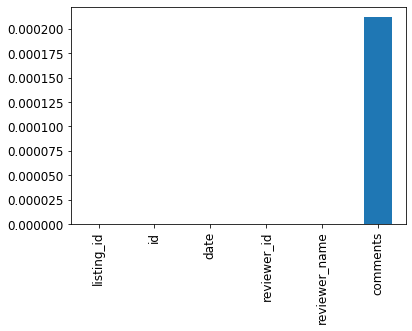

In [17]:
#get percenatage of missing values in reviews dataframe
%matplotlib inline
reviews.isnull().mean().plot.bar(figsize=(6,4), fontsize = 12);

In [18]:
#drop the rows with missing comments
reviews = reviews[reviews['comments'].notna()]
#add month
reviews['month'] = pd.DatetimeIndex(reviews['date']).month
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,month
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,7
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,7
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",7
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,8
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,8


<h1>Question 1: Which months are the busiest in Seattle? What is the correlation between month and price?

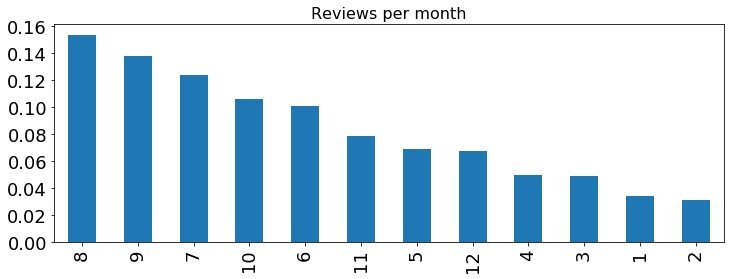

In [19]:
# number of reviews per month
reviews_per_month = reviews['month'].value_counts()
(reviews_per_month/reviews.shape[0]).plot(kind="bar", figsize=(12,4));
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Reviews per month", fontsize = 16);

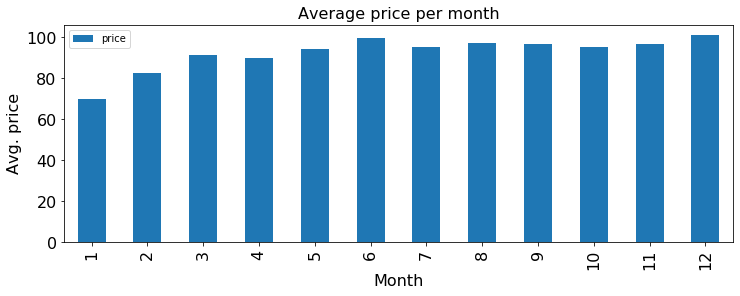

In [20]:
# to get the average prices by month, we group the average of the price by month
price_by_month = calendar.groupby('month', as_index=False)['price'].mean()
price_by_month.plot.bar(x='month', y = 'price', figsize=(12,4));
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Avg. price', fontsize = 16)
plt.title("Average price per month", fontsize = 16);

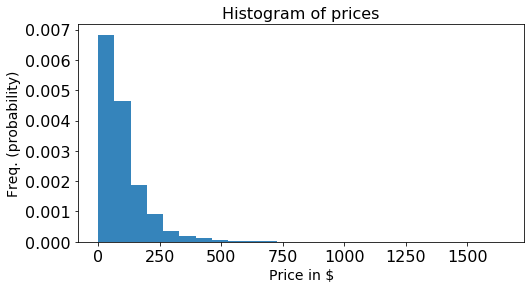

In [21]:
## Plot histogram of prices
bins=list(range(0, 10, 1700))
#print(bins)
ax = calendar['price'].plot.hist(by = 'price', bins=25, density=True, alpha=0.9, figsize=(8,4))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Price in $', fontsize = 14)
plt.ylabel('Freq. (probability)', fontsize = 14)
plt.title("Histogram of prices", fontsize = 16);

We can see from the plots above, August is the busiest month to visit Seattle and July is the most epensive month, followed by August. We can see a correlation between the price and busy month.

<h1> What is the feature of the neighbourhood?

In [23]:
df = listings[['neighborhood_overview', 'neighbourhood_cleansed']]
df.head()

,neighborhood_overview,neighbourhood_cleansed
0,NaN,West Queen Anne
1,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne
2,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne
3,NaN,West Queen Anne
4,We are in the beautiful neighborhood of Queen ...,West Queen Anne


In [24]:
df = df.dropna()
df.head()

,neighborhood_overview,neighbourhood_cleansed
1,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne
2,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne
4,We are in the beautiful neighborhood of Queen ...,West Queen Anne
5,This part of Queen Anne has wonderful views an...,West Queen Anne
6,"Close restaurants, coffee shops and grocery st...",West Queen Anne


In [25]:
overview = pd.DataFrame(columns = ['description', 'common_words']) # prepare the dataframe
overview['description'] = df.groupby('neighbourhood_cleansed', as_index=True)['neighborhood_overview'].sum()
overview['name'] = overview.index
overview.fillna('', inplace=True)
overview.head()

,description,common_words,name
neighbourhood_cleansed,,,
Adams,"Walk score: 90. Nuff said.Ballard is a quaint,...",,Adams
Alki,Alki Beach is an awesome place during the summ...,,Alki
Arbor Heights,"nice residential neighborhood, away from the h...",,Arbor Heights
Atlantic,Our Central District neighborhood is close to ...,,Atlantic
Belltown,This neighborhood is AWESOME! We are: - 1 stre...,,Belltown


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
def get_top_n_bigram(corpus, n=None): 
    '''
    A function for getting top bigrams of a text
    It takes a text corpus and a number n as input
    Returns top n bi-grams of from corpus with frequency excluding stop words
    '''
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [28]:
## get top bigrams form neighbourhood_overview descriptions using the above function
for i in range(overview.shape[0]):
    common_words = get_top_n_bigram([overview['description'][i]], 5)
    for word, freq in common_words:
        overview['common_words'][i] = overview['common_words'][i] + word + '; '
        
overview.head()

,description,common_words,name
neighbourhood_cleansed,,,
Adams,"Walk score: 90. Nuff said.Ballard is a quaint,...",golden gardens; ballard locks; downtown seattl...,Adams
Alki,Alki Beach is an awesome place during the summ...,alki beach; west seattle; downtown seattle; te...,Alki
Arbor Heights,"nice residential neighborhood, away from the h...",nice residential; residential neighborhood; ne...,Arbor Heights
Atlantic,Our Central District neighborhood is close to ...,capitol hill; international district; downtown...,Atlantic
Belltown,This neighborhood is AWESOME! We are: - 1 stre...,pike place; place market; space needle; downto...,Belltown


In [30]:
print(" 'Adams' feature: ", overview['common_words'].loc[overview['name'] == 'Adams'].values[0])
print(" 'Arbor Heights' feature: ", overview['common_words'].loc[overview['name'] == 'Arbor Heights'].values[0])
print(" 'Industrial District' feature: ", overview['common_words'].loc[overview['name'] == 'Industrial District'].values[0])
print(" 'South Park' feature: ", overview['common_words'].loc[overview['name'] == 'South Park'].values[0])
print(" 'Broadway' feature: ", overview['common_words'].loc[overview['name'] == 'Broadway'].values[0])

 'Adams' feature:  golden gardens; ballard locks; downtown seattle; gardens beach; farmers market; golden gardens; ballard locks; downtown seattle; gardens beach; farmers market; 
 'Arbor Heights' feature:  nice residential; residential neighborhood; neighborhood away; away hustle; hustle bustle; nice residential; residential neighborhood; neighborhood away; away hustle; hustle bustle; 
 'Industrial District' feature:  experience seattle; seattle founded; founded explore; explore historic; historic district; experience seattle; seattle founded; founded explore; explore historic; historic district; 
 'South Park' feature:  oldest neighborhood; neighborhood lots; lots character; character south; south park; oldest neighborhood; neighborhood lots; lots character; character south; south park; 
 'Broadway' feature:  capitol hill; minute walk; walking distance; volunteer park; pike pine; capitol hill; minute walk; walking distance; volunteer park; pike pine; 


<h1> How number of bedrooms affect the price of the listings?

In [33]:
roomtype=listings.groupby('room_type').id.count()
roomtype=roomtype.reset_index()
roomtype=roomtype.rename(columns={'id':'Count'})
roomtype

,room_type,Count
0,Entire home/apt,2541
1,Private room,1160
2,Shared room,117


Text(0, 0.5, 'count of listings')

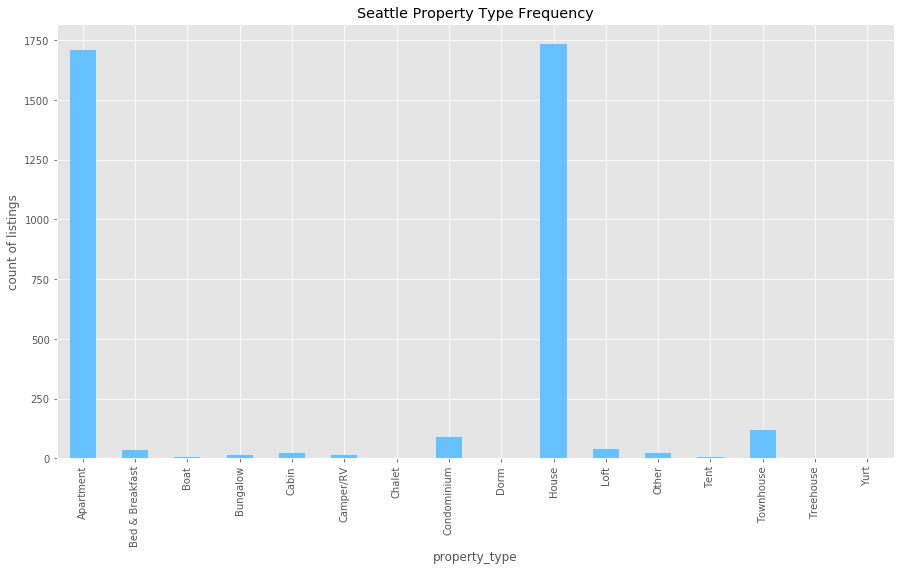

In [37]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

propertytype = listings.groupby('property_type').id.count()
propertytype= propertytype.reset_index()
propertytype=propertytype.rename(columns={'id':'count of listings'})

objects = propertytype['property_type']
y_pos = propertytype['count of listings']

propertytype.plot(kind='bar', 
           x='property_type',
           y='count of listings',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Seattle Property Type Frequency', 
           legend = False)
plt.ylabel('property type')
plt.ylabel('count of listings')

People are more inclined towards listing their entire property than listing private rooms or shared rooms.It can also be seen that property type also plays an important role.

In [43]:
propertyprice = listings.groupby(['property_type','room_type']).price.mean()
propertyprice = propertyprice.reset_index()
propertyprice = propertyprice.sort_values('price',ascending=[0])
propertyprice.head()

,property_type,room_type,price
6,Boat,Entire home/apt,513.333333
19,House,Entire home/apt,194.824859
29,Townhouse,Entire home/apt,189.818182
22,Loft,Entire home/apt,178.933333
15,Condominium,Entire home/apt,170.490566


(87.5, -0.5)

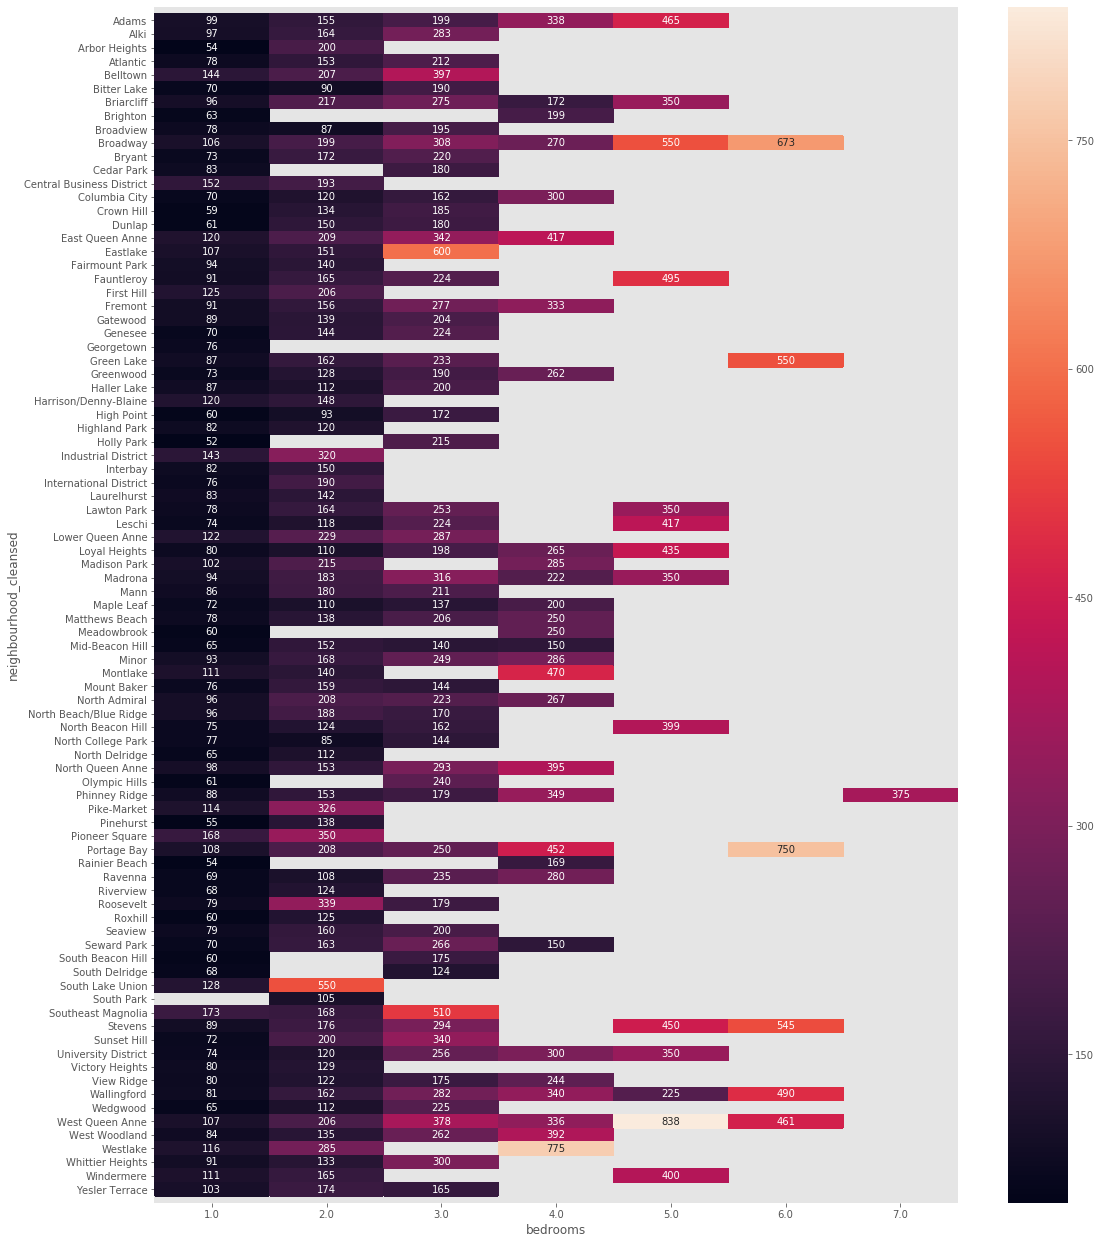

In [47]:
import seaborn as sns

plt.figure(figsize=(18,22))
ax = sns.heatmap(listings.groupby([
        'neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)